In [1]:
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
import math as m
import matplotlib as mpl
from matplotlib.pyplot import cm
import re
import argparse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.classes import *

sns.set_context("paper", rc={"font.size":14})

In [8]:
def plot_singleR(singler_counts, singler_df, output, dataset='TX'):
    celltypes = [x for x in singler_counts.index if x != 'Other']
    umap_all = singler_df[['umap1', 'umap2']]

    cols = 3
    rows = m.ceil(len(celltypes)/cols)
    plt.figure(figsize=(10 * cols, 10 * rows))
    s = 50
    for idx, celltype in enumerate(celltypes):
        plt.subplot(rows, cols, idx + 1)
        umap_celltype = singler_df[singler_df['Celltype_SingleR'] == celltype][['umap1', 'umap2']]
        plt.scatter(x=umap_all['umap1'], y=umap_all['umap2'],
                    color='lightgrey', edgecolors='#A9A9A9', s=s, alpha=0.7,
                   linewidths=0.4)
        plt.scatter(x=umap_celltype['umap1'], y=umap_celltype['umap2'],
#                     color='#fe7b7c',
                    color=(252/255, 130/255, 157/255, 0.4),
                    edgecolors=(0.6,0.1,0.1,0.4), 
                    linewidths=1, s=s)
        if len(umap_celltype['umap1'])<100:
            levels = 3
        else:
            levels= 7
        sns.kdeplot(x=umap_celltype['umap1'], y=umap_celltype['umap2'], 
                    alpha=0.7, color='black', levels=levels, thresh=.1)
        plt.box(False)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel("\n".join(wrap(celltype, 30)), fontsize=25)

#     plt.savefig(output + 'SingleR_UMAP_celltype_distribution_' + dataset + '.pdf', dpi=400, bbox_inches='tight')
#     plt.savefig(output + 'SingleR_UMAP_celltype_distribution_' + dataset + '.png', dpi=400, bbox_inches='tight')
    plt.tight_layout()
    plt.show()
    plt.clf()

In [3]:
region_marker_dict= {'STR': ['PENK', 'ADORA2A', 'PPP1R1B'],
                         'SN': ['TH', 'PBX1', 'SLC6A3', 'ALDH1A1', 'DDC', 'RET']}
animal_mapping = {'CN56': 'Nude-2', 'ST3': 'Nude-1', 'CN57': 'WT-3', 'CN53': 'Nude-3', 'ST1': 'WT-1'}

In [4]:
singler_file = '../../results/SingleR/hESC_TX_sc_SingleR_analysisL5_CTX_M_STR_CNS_description_selection_1000_astmerged_Tax4.tsv'
singleR_df = pd.read_csv(singler_file, sep='\t', header=0, index_col=0)
singleR_df['Celltype_SingleR'] = singleR_df['Celltype_SingleR'].astype('category')
singleR_df

c..rat11.1a_AAAGATGGTGTAACGG.1....rat11.1a_AAAGTAGCAGGAACGT.1...  \
1                           rat11-1a_AAAGATGGTGTAACGG-1                 
2                           rat11-1a_AAAGTAGCAGGAACGT-1                 
3                           rat11-1a_AAATGCCAGCAACGGT-1                 
4                           rat11-1a_AACACGTTCATGTCCC-1                 
5                           rat11-1a_AACTCTTAGTAGATGT-1                 
...                                                 ...                 
7871                        rat45-1b_TTTGTCACAGTAAGCG-1                 
7872                        rat45-1b_TTTGTCAGTCTACCTC-1                 
7873                        rat45-1b_TTTGTCAGTTGCGCAC-1                 
7874                        rat45-1b_TTTGTCATCCACGTTC-1                 
7875                        rat45-1b_TTTGTCATCTCCAACC-1                 

                          Celltype_SingleR  cluster     umap1     umap2  
1     Vascular leptomeningeal cells; mouse        1  2.715782 -8.870185  
2     Dentate gyrus radial glia-like cells        0 -5.531876  2.146267  
3     Dentate gyrus radial glia-like cells        0 -0.176593  3.554566  
4     Dentate gyrus radial glia-like cells        0 -0.996965  4.126979  
5     Dentate gyrus radial glia-like cells        0 -4.189439  0.044979  
...                                    ...      ...       ...       ...  
7871  Dentate gyrus radial glia-like cells        0 -1.947990  0.824142  
7872  Dentate gyrus radial glia-like cells        0 -0.574730 -0.069834  
7873  Dentate gyrus radial glia-like cells        0  1.210748  2.583290  
7874  Dentate gyrus radial glia-like cells        0 -5.182932  2.881242  
7875  Vascular leptomeningeal cells; mouse        0  3.586821 -4.853841  

[7875 rows x 5 columns]

In [5]:
singleR_counts = singleR_df['Celltype_SingleR'].value_counts()
singleR_counts = singleR_counts[singleR_counts>20]
singleR_counts

Dentate gyrus radial glia-like cells          3814
Vascular leptomeningeal cells; mouse          2091
Non-glutamatergic neuroblasts                  891
Subventricular zone radial glia-like cells     860
Telencephalon inhibitory interneurons           76
Neuroblasts                                     45
Cholinergic interneurons; mouse                 43
Astrocytes; mouse                               24
Dopaminergic neurons; mouse                     24
Name: Celltype_SingleR, dtype: int64

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

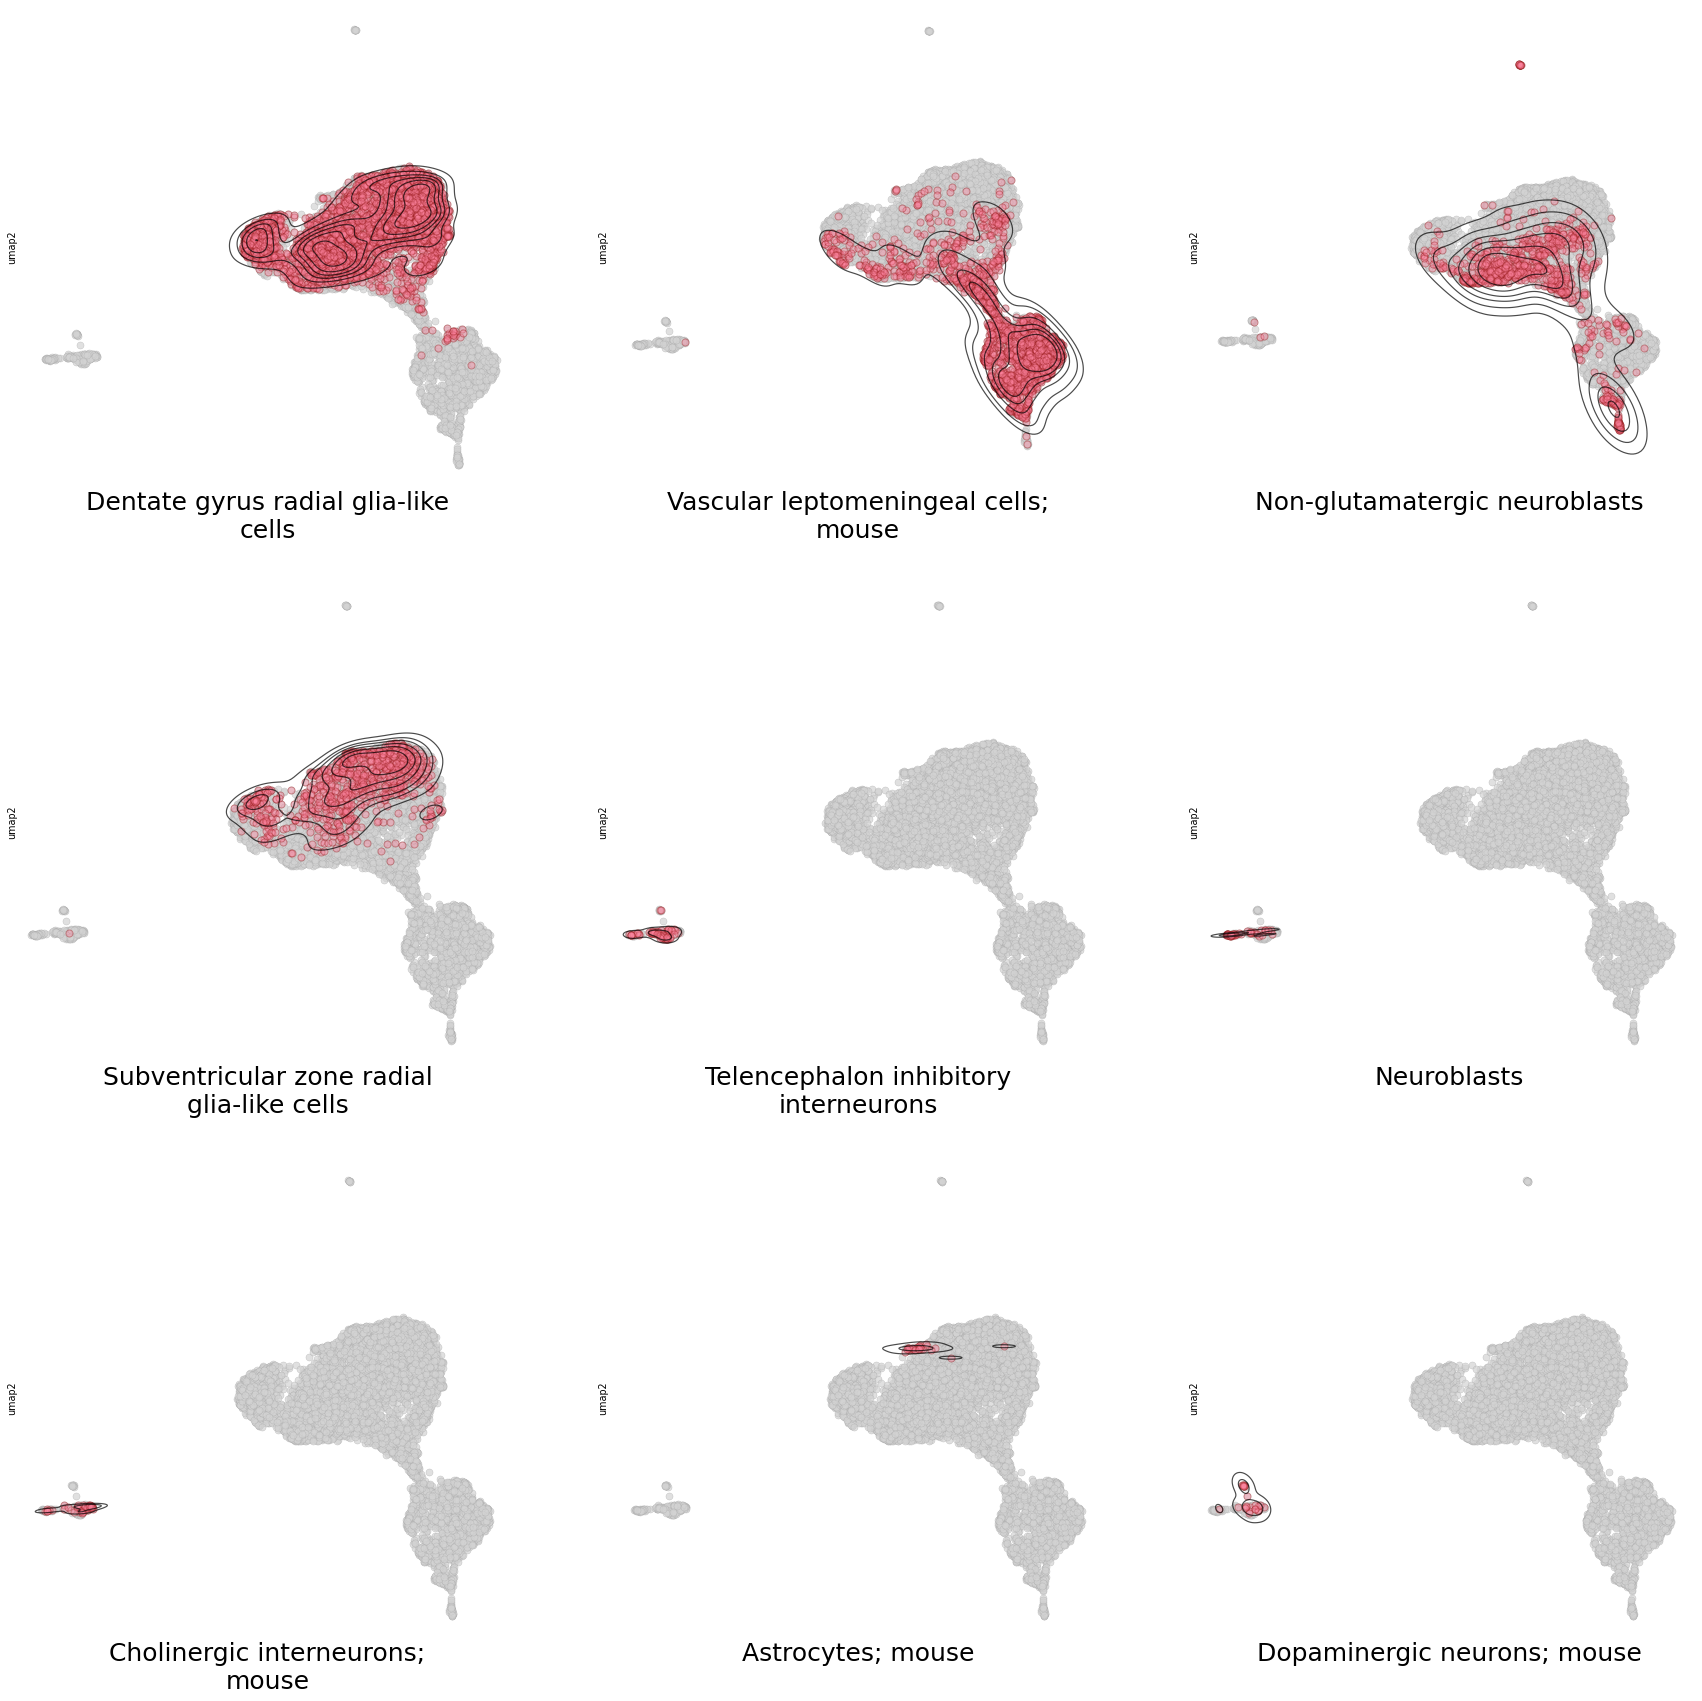

In [7]:
plot_singleR(singleR_counts, singleR_df, output=None)

In [9]:
deconv_h5ad_path = '../../results/cell2loc_res/L5_CTX_M_STR_CNS_Tax4_selection_1000_astro-merge/TX/cell2location_map/sp.h5ad'
cluster_regions_h5ad_path = '../../results/Batch_corrections/seurat/TX/TX_st_adata_cluster_regions.h5ad'
cluster_h5ad_path = '../../results/Batch_corrections/seurat/TX/TX_st_adata_cluster.h5ad'

deconv_h5ad = sc.read_h5ad(deconv_h5ad_path)
cluster_h5ad = sc.read_h5ad(cluster_h5ad_path)
cluster_region_h5ad = sc.read_h5ad(cluster_regions_h5ad_path)

cluster_h5ad.obs

output = f'{"/".join(cluster_h5ad_path.split("/")[:-1])}/'
output

/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


'../../results/Batch_corrections/seurat/TX/'

In [10]:
scores_df = cluster_h5ad.obs
scores_df.index = scores_df['sample'].astype('str') + '_' + scores_df['cluster'].astype('str')
scores_df['pseudo_cluster'] = scores_df.index
cluster_region_h5ad.obs.index = cluster_region_h5ad.obs['sample'].astype('str') + '_' + cluster_region_h5ad.obs['cluster'].astype('str')
cols = [x for x in cluster_region_h5ad.obs.columns if '_score' in x or 'G_content' in x]
for col in cols:
    col_dict = cluster_region_h5ad.obs[col].to_dict()
    
    scores_df[col + '-pseudo'] = scores_df['pseudo_cluster'].map(col_dict)
# print(f'{"/".join(deconv_h5ad_path.split("/")[:-1])}')
scores_df.to_csv(f'{"/".join(deconv_h5ad_path.split("/")[:-1])}/region_content_scores.tsv', sep='\t')
scores_df

feature orig_feature  array_row  array_col  in_tissue  \
ST3_C2_3    X4.95_14.07        X5_14        5.0       14.0          1   
ST3_C2_2    X4.95_11.06        X5_11        5.0       11.0          1   
ST3_C2_3   X15.94_14.05       X16_14       16.0       14.0          1   
ST3_C2_1    X8.01_14.97        X8_15        8.0       15.0          1   
ST3_C2_3   X10.91_24.02       X11_24       11.0       24.0          1   
...                 ...          ...        ...        ...        ...   
CN53_C1_3  X19.95_20.05       X20_20       20.0       20.0          1   
CN53_C1_2  X23.22_30.02       X23_30       23.0       30.0          1   
CN53_C1_3  X19.85_13.09       X20_13       20.0       13.0          1   
CN53_C1_6   X24.1_26.01       X24_26       24.0       26.0          1   
CN53_C1_2  X14.81_30.96       X15_31       15.0       31.0          1   

            sample slide  median_gene_feature  median_transcript_feature   x  \
ST3_C2_3    ST3_C2   ST3               1409.0                     2671.0   5   
ST3_C2_2    ST3_C2   ST3               1409.0                     2671.0   5   
ST3_C2_3    ST3_C2   ST3               1409.0                     2671.0  16   
ST3_C2_1    ST3_C2   ST3               1409.0                     2671.0   8   
ST3_C2_3    ST3_C2   ST3               1409.0                     2671.0  11   
...            ...   ...                  ...                        ...  ..   
CN53_C1_3  CN53_C1  CN53               2636.0                     5573.0  20   
CN53_C1_2  CN53_C1  CN53               2636.0                     5573.0  23   
CN53_C1_3  CN53_C1  CN53               2636.0                     5573.0  20   
CN53_C1_6  CN53_C1  CN53               2636.0                     5573.0  24   
CN53_C1_2  CN53_C1  CN53               2636.0                     5573.0  15   

           ...  RNOG_content  cluster     umap1     umap2  pseudo_cluster  \
ST3_C2_3   ...      0.956171        3  7.466977 -0.785746        ST3_C2_3   
ST3_C2_2   ...      0.956386        2 -5.826620 -1.173644        ST3_C2_2   
ST3_C2_3   ...      0.923306        3  5.503290 -0.855115        ST3_C2_3   
ST3_C2_1   ...      0.953890        1  7.132613 -1.389697        ST3_C2_1   
ST3_C2_3   ...      0.963572        3  7.078153  2.138189        ST3_C2_3   
...        ...           ...      ...       ...       ...             ...   
CN53_C1_3  ...      0.914654        3  8.477002  0.500053       CN53_C1_3   
CN53_C1_2  ...      0.927069        2 -6.433095 -3.560959       CN53_C1_2   
CN53_C1_3  ...      0.882264        3  8.103698  1.479813       CN53_C1_3   
CN53_C1_6  ...      0.919016        6 -2.330137 -0.016068       CN53_C1_6   
CN53_C1_2  ...      0.930932        2 -5.581476 -4.115334       CN53_C1_2   

           G_content-pseudo  RNOG_content-pseudo  STR_score-pseudo  \
ST3_C2_3           0.056346             0.943654          1.560801   
ST3_C2_2           0.039202             0.960798         -0.556747   
ST3_C2_3           0.056346             0.943654          1.560801   
ST3_C2_1           0.042754             0.957246          2.319926   
ST3_C2_3           0.056346             0.943654          1.560801   
...                     ...                  ...               ...   
CN53_C1_3          0.082021             0.917979          1.082335   
CN53_C1_2          0.071645             0.928355         -0.444503   
CN53_C1_3          0.082021             0.917979          1.082335   
CN53_C1_6          0.078874             0.921126         -0.248210   
CN53_C1_2          0.071645             0.928355         -0.444503   

           CTX_score-pseudo  CC_score-pseudo  
ST3_C2_3          -1.010696         0.329789  
ST3_C2_2           2.147697         0.379334  
ST3_C2_3          -1.010696         0.329789  
ST3_C2_1          -1.141114        -0.156730  
ST3_C2_3          -1.010696         0.329789  
...                     ...              ...  
CN53_C1_3         -0.883820         0.191497  
CN53_C1_2          0.972599        -

In [13]:
cluster_region_h5ad.obs[['sample', 'cluster', 'region']]
cluster_region_dict = cluster_region_h5ad.obs[['cluster', 'region']]
cluster_region_dict.set_index('cluster', inplace=True)
cluster_region_dict = cluster_region_dict['region'].to_dict()
cluster_region_dict

{'1': 'STR',
 '10': 'CC',
 '11': 'other',
 '12': 'CTX',
 '13': 'TX',
 '14': 'other',
 '15': 'other',
 '2': 'CTX',
 '3': 'STR',
 '4': 'other',
 '5': 'other',
 '6': 'other',
 '7': 'CTX',
 '8': 'CC',
 '9': 'STR'}

In [14]:
cluster_h5ad.var

ensembl_id  \
gene_id                             
1110065P20RIK  ENSRNOG00000042421   
2810021J22RIK  ENSRNOG00000023431   
A2ML1             ENSG00000166535   
A2ML1-AS1         ENSG00000256661   
A4GALT            ENSG00000128274   
...                           ...   
ZYG11A            ENSG00000203995   
ZYG11B            ENSG00000162378   
ZYX            ENSRNOG00000017354   
ZZEF1             ENSG00000074755   
ZZZ3              ENSG00000036549   

                                                            name  \
gene_id                                                            
1110065P20RIK                         RIKEN cDNA 1110065P20 gene   
2810021J22RIK                        zinc finger protein 39-like   
A2ML1                               alpha-2-macroglobulin like 1   
A2ML1-AS1                                  A2ML1 antisense RNA 1   
A4GALT           alpha 1,4-galactosyltransferase (P blood group)   
...                                                          ...   
ZYG11A              zyg-11 family member A, cell cycle regulator   
ZYG11B              zyg-11 family member B, cell cycle regulator   
ZYX                                                        zyxin   
ZZEF1          zinc finger ZZ-type and EF-hand domain contain...   
ZZZ3                            zinc finger ZZ-type containing 3   

                     gene_id  species  value    Gene_no_alt     MT   ribo  
gene_id                                                                    
1110065P20RIK  1110065P20RIK  ENSRNOG      0  1110065P20RIK  False  False  
2810021J22RIK  2810021J22RIK  ENSRNOG      0  2810021J22RIK  False  False  
A2ML1                  A2ML1     ENSG      0          A2ML1  False  False  
A2ML1-AS1          A2ML1-AS1     ENSG      0      A2ML1-AS1  False  False  
A4GALT                A4GALT     ENSG      0         A4GALT  False  False  
...                      ...      ...    ...            ...    ...    ...  
ZYG11A                ZYG11A     ENSG      0         ZYG11A  False  False  
ZYG11B                ZYG11B     ENSG      0         ZYG11B  False  False  
ZYX                      ZYX  ENSRNOG      0            ZYX  False  False  
ZZEF1                  ZZEF1     ENSG      0          ZZEF1  False  False  
ZZZ3                    ZZZ3     ENSG      0           ZZZ3  False  False  

[15172 rows x 8 columns]


FABP7 in var
vmax = 3.0


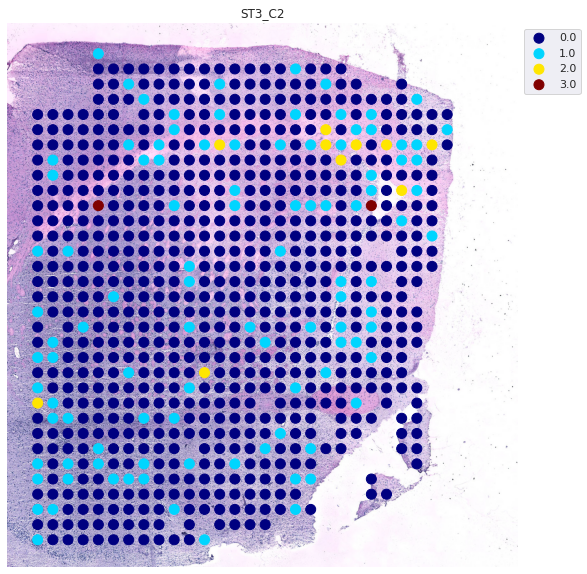


FABP7 in var
vmax = 6.0


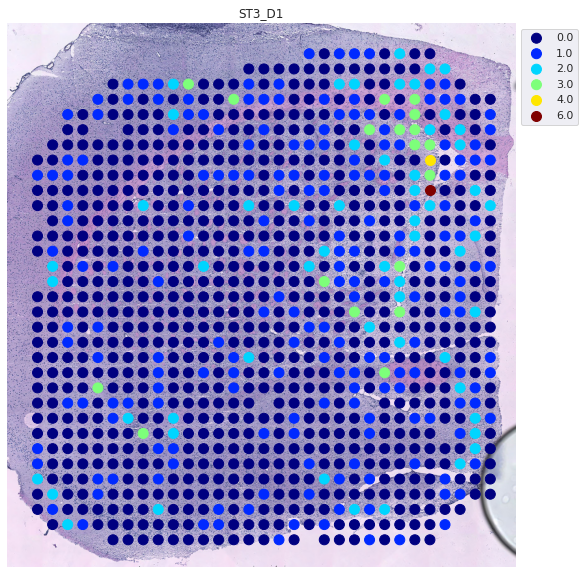


FABP7 in var
vmax = 8.0


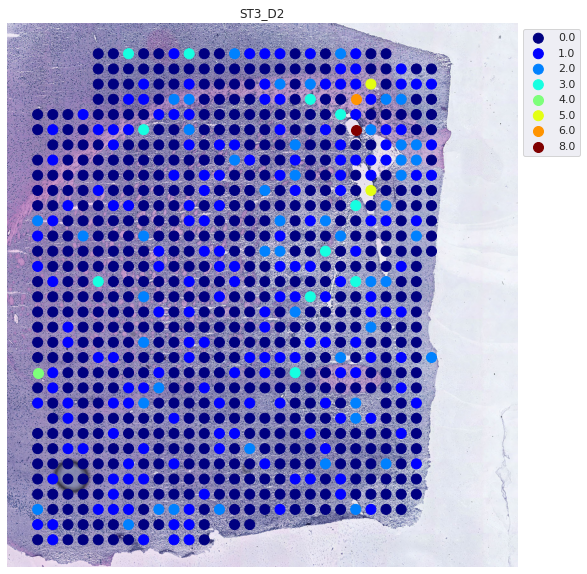


FABP7 in var
vmax = 11.0


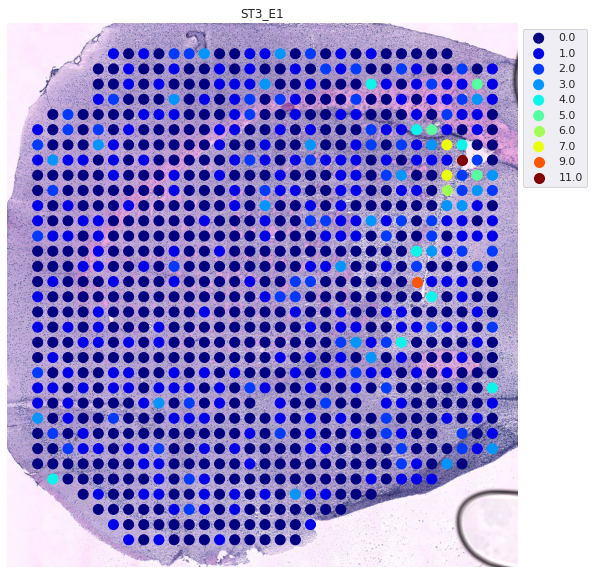


FABP7 in var
vmax = 7.0


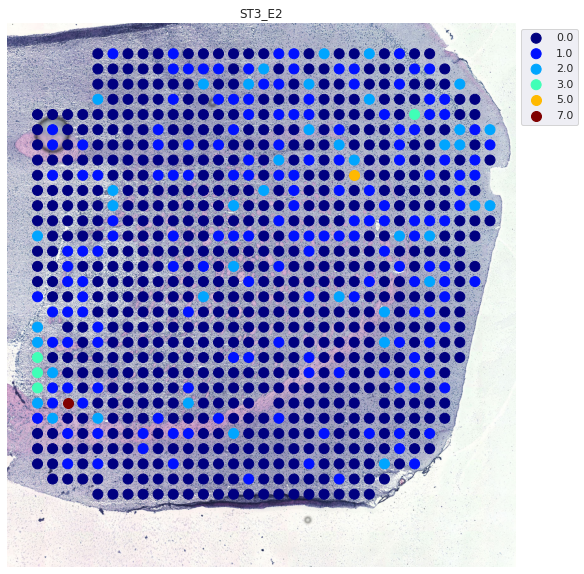


FABP7 in var
vmax = 12.0


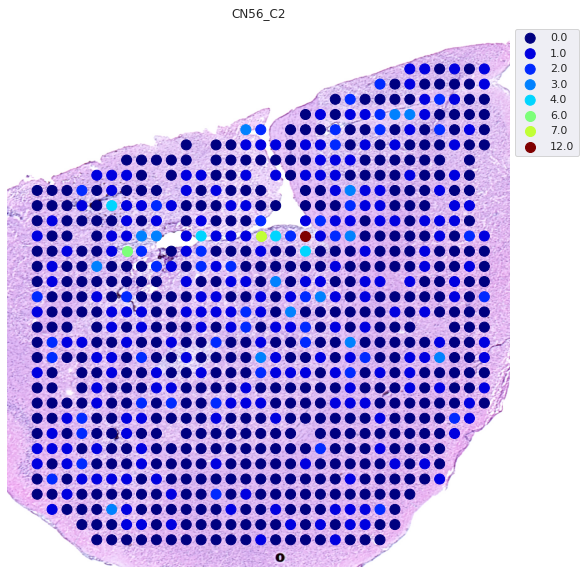


FABP7 in var
vmax = 9.0


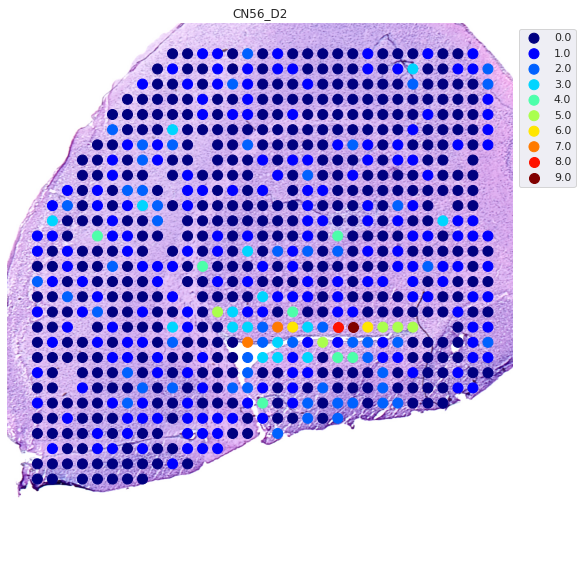


FABP7 in var
vmax = 9.0


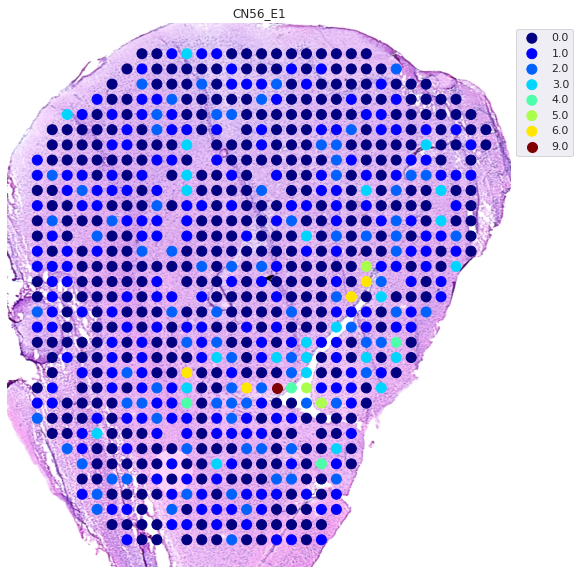


FABP7 in var
vmax = 14.0


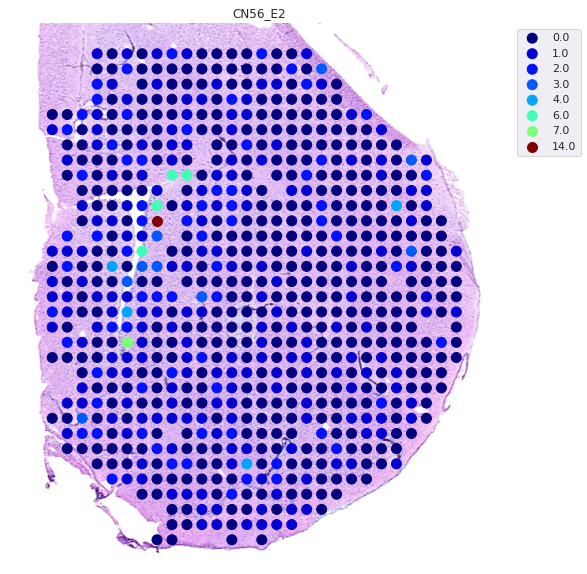


FABP7 in var
vmax = 5.0


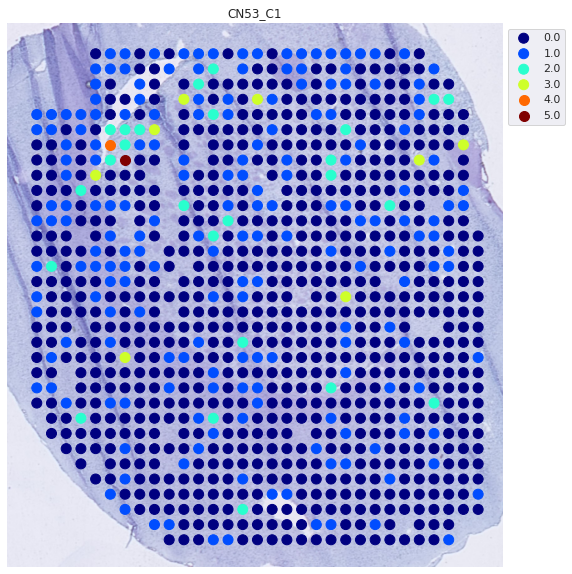

<Figure size 720x720 with 0 Axes>

In [18]:
output_gene = f'{output}clusters/'
os.makedirs(output_gene, exist_ok=True)
samples= cluster_h5ad.obs['sample'].unique()
for sample in samples:
    plot_ST(cluster_h5ad, sample,color='FABP7', 
#             output=output_gene, 
            vmax_global=False, s=100)

In [34]:
cluster_type = type(list(cluster_region_dict.keys())[0])

In [35]:
cluster_h5ad.obs['cluster'] = cluster_h5ad.obs['cluster'].astype(cluster_type)
cluster_h5ad.obs['region'] = cluster_h5ad.obs['cluster'].map(cluster_region_dict)
cluster_h5ad.obs[['sample', 'cluster', 'region']]

sample cluster region
CN57_E1_8   CN57_E1       8  other
CN57_E1_8   CN57_E1       8  other
CN57_E1_1   CN57_E1       1  other
CN57_E1_2   CN57_E1       2  other
CN57_E1_6   CN57_E1       6  other
...             ...     ...    ...
CN53_E2_11  CN53_E2      11  other
CN53_E2_10  CN53_E2      10  other
CN53_E2_4   CN53_E2       4  other
CN53_E2_2   CN53_E2       2  other
CN53_E2_6   CN53_E2       6  other

[4816 rows x 3 columns]

In [36]:
cluster_h5ad.obs.index = cluster_h5ad.obs['sample'].astype('str') + '_' + cluster_h5ad.obs['feature'].astype('str')
deconv_df = deconv_h5ad.obsm['q05_cell_abundance_w_sf']
deconv_df.columns = [x.replace('q05cell_abundance_w_sf_', '') for x in deconv_df.columns]
deconv_df_perc = deconv_df.div(deconv_df.sum(axis=1), axis=0)
celltypes = deconv_df.columns


strip_df_perc = cluster_h5ad.obs.join(deconv_df_perc)

In [37]:
cols = ['sample', 'feature', 'cluster'] + list(deconv_df_perc.columns)

plot_export_df = strip_df_perc[cols]
plot_export_df['region'] = plot_export_df['cluster'].map(cluster_region_dict)
plot_export_df.to_csv(f'{"/".join(deconv_h5ad_path.split("/")[:-1])}/celltype_content_all_features.tsv', sep='\t')
plot_export_df

/tmp/ipykernel_10229/3506628923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_export_df['region'] = plot_export_df['cluster'].map(cluster_region_dict)


sample       feature cluster  Astrocytes; mouse  \
CN57_E1_X25.97_9.07   CN57_E1   X25.97_9.07       8           0.160031   
CN57_E1_X15.91_15.95  CN57_E1  X15.91_15.95       8           0.162831   
CN57_E1_X25.96_6.08   CN57_E1   X25.96_6.08       1           0.277845   
CN57_E1_X26.36_14.98  CN57_E1  X26.36_14.98       2           0.107781   
CN57_E1_X3.84_20.84   CN57_E1   X3.84_20.84       6           0.152370   
...                       ...           ...     ...                ...   
CN53_E2_X1.92_22.98   CN53_E2   X1.92_22.98      11           0.140431   
CN53_E2_X4.99_22.98   CN53_E2   X4.99_22.98      10           0.122931   
CN53_E2_X9.05_14.93   CN53_E2   X9.05_14.93       4           0.098254   
CN53_E2_X19.73_19.97  CN53_E2  X19.73_19.97       2           0.105484   
CN53_E2_X19.73_13.0   CN53_E2   X19.73_13.0       6           0.137503   

                      Cerebellum neurons  Cholinergic interneurons; mouse  \
CN57_E1_X25.97_9.07             0.184762                         0.039254   
CN57_E1_X15.91_15.95            0.149958                         0.068996   
CN57_E1_X25.96_6.08             0.093840                         0.039899   
CN57_E1_X26.36_14.98            0.137831                         0.040325   
CN57_E1_X3.84_20.84             0.096708                         0.052906   
...                                  ...                              ...   
CN53_E2_X1.92_22.98             0.221785                         0.026597   
CN53_E2_X4.99_22.98             0.247434                         0.018676   
CN53_E2_X9.05_14.93             0.226420                         0.045780   
CN53_E2_X19.73_19.97            0.265917                         0.045945   
CN53_E2_X19.73_13.0             0.191568                         0.035577   

                      Cortical projection neurons; mouse  \
CN57_E1_X25.97_9.07                             0.002211   
CN57_E1_X15.91_15.95                            0.002278   
CN57_E1_X25.96_6.08                             0.009743   
CN57_E1_X26.36_14.98                            0.006857   
CN57_E1_X3.84_20.84                             0.003007   
...                                                  ...   
CN53_E2_X1.92_22.98                             0.034504   
CN53_E2_X4.99_22.98                             0.018656   
CN53_E2_X9.05_14.93                             0.002141   
CN53_E2_X19.73_19.97                            0.002829   
CN53_E2_X19.73_13.0                             0.003276   

                      D1 Medium Spiny Neurons; mouse  \
CN57_E1_X25.97_9.07                         0.003580   
CN57_E1_X15.91_15.95                        0.001287   
CN57_E1_X25.96_6.08                         0.003071   
CN57_E1_X26.36_14.98                        0.002310   
CN57_E1_X3.84_20.84                         0.001054   
...                                              ...   
CN53_E2_X1.92_22.98                         0.009499   
CN53_E2_X4.99_22.98                         0.008145   
CN53_E2_X9.05_14.93                         0.007368   
CN53_E2_X19.73_19.97                        0.006528   
CN53_E2_X19.73_13.0                         0.006509   

                      D1/D2 Medium Spiny Neurons, striatum  \
CN57_E1_X25.97_9.07                               0.008437   
CN57_E1_X15.91_15.95                              0.002722   
CN57_E1_X25.96_6.08                               0.003122   
CN57_E1_X26.36_14.98                              0.004458   
CN57_E1_X3.84_20.84                               0.002268   
...                                                    ...   
CN53_E2_X1.92_22.98                               0.017364   
CN53_E2_X4.99_22.98                               0.019051   
CN53_E2_X9.05_14.93                               0.014573   
CN53_E2_X19.73_19.97                              0.015037   
CN53_E2_X19.73_13.0                               0.014771   

                      D2 Medium Spiny Neurons; mouse  ...  \
CN57_E1_X

In [16]:
f'{"/".join(deconv_h5ad_path.split("/")[:-1])}/celltype_content_TX_features.tsv'

'../../results/cell2loc_res/L5_CTX_M_STR_CNS_Tax4_selection_1000_astro-merge/TX/cell2location_map/celltype_content_TX_features.tsv'

In [17]:
plot_export_TX_df = plot_export_df.copy()
plot_export_TX_df.loc[(plot_export_TX_df['region']!='TX'), list(deconv_df_perc.columns)] = -0.001
plot_export_TX_df.to_csv(f'{"/".join(deconv_h5ad_path.split("/")[:-1])}/celltype_content_TX_features.tsv', sep='\t')
plot_export_TX_df

sample       feature cluster  Astrocytes; mouse  \
ST3_C2_X4.95_14.07     ST3_C2   X4.95_14.07       3             -0.001   
ST3_C2_X4.95_11.06     ST3_C2   X4.95_11.06       2             -0.001   
ST3_C2_X15.94_14.05    ST3_C2  X15.94_14.05       3             -0.001   
ST3_C2_X8.01_14.97     ST3_C2   X8.01_14.97       1             -0.001   
ST3_C2_X10.91_24.02    ST3_C2  X10.91_24.02       3             -0.001   
...                       ...           ...     ...                ...   
CN53_C1_X19.95_20.05  CN53_C1  X19.95_20.05       3             -0.001   
CN53_C1_X23.22_30.02  CN53_C1  X23.22_30.02       2             -0.001   
CN53_C1_X19.85_13.09  CN53_C1  X19.85_13.09       3             -0.001   
CN53_C1_X24.1_26.01   CN53_C1   X24.1_26.01       6             -0.001   
CN53_C1_X14.81_30.96  CN53_C1  X14.81_30.96       2             -0.001   

                      Cerebellum neurons  Cholinergic interneurons; mouse  \
ST3_C2_X4.95_14.07                -0.001                           -0.001   
ST3_C2_X4.95_11.06                -0.001                           -0.001   
ST3_C2_X15.94_14.05               -0.001                           -0.001   
ST3_C2_X8.01_14.97                -0.001                           -0.001   
ST3_C2_X10.91_24.02               -0.001                           -0.001   
...                                  ...                              ...   
CN53_C1_X19.95_20.05              -0.001                           -0.001   
CN53_C1_X23.22_30.02              -0.001                           -0.001   
CN53_C1_X19.85_13.09              -0.001                           -0.001   
CN53_C1_X24.1_26.01               -0.001                           -0.001   
CN53_C1_X14.81_30.96              -0.001                           -0.001   

                      Cortical projection neurons; mouse  \
ST3_C2_X4.95_14.07                                -0.001   
ST3_C2_X4.95_11.06                                -0.001   
ST3_C2_X15.94_14.05                               -0.001   
ST3_C2_X8.01_14.97                                -0.001   
ST3_C2_X10.91_24.02                               -0.001   
...                                                  ...   
CN53_C1_X19.95_20.05                              -0.001   
CN53_C1_X23.22_30.02                              -0.001   
CN53_C1_X19.85_13.09                              -0.001   
CN53_C1_X24.1_26.01                               -0.001   
CN53_C1_X14.81_30.96                              -0.001   

                      D1 Medium Spiny Neurons; mouse  \
ST3_C2_X4.95_14.07                            -0.001   
ST3_C2_X4.95_11.06                            -0.001   
ST3_C2_X15.94_14.05                           -0.001   
ST3_C2_X8.01_14.97                            -0.001   
ST3_C2_X10.91_24.02                           -0.001   
...                                              ...   
CN53_C1_X19.95_20.05                          -0.001   
CN53_C1_X23.22_30.02                          -0.001   
CN53_C1_X19.85_13.09                          -0.001   
CN53_C1_X24.1_26.01                           -0.001   
CN53_C1_X14.81_30.96                          -0.001   

                      D1/D2 Medium Spiny Neurons, striatum  \
ST3_C2_X4.95_14.07                                  -0.001   
ST3_C2_X4.95_11.06                                  -0.001   
ST3_C2_X15.94_14.05                                 -0.001   
ST3_C2_X8.01_14.97                                  -0.001   
ST3_C2_X10.91_24.02                                 -0.001   
...                                                    ...   
CN53_C1_X19.95_20.05                                -0.001   
CN53_C1_X23.22_30.02                                -0.001   
CN53_C1_X19.85_13.09                                -0.001   
CN53_C1_X24.1_26.01                                 -0.001   
CN53_C1_X14.81_30.96                                -0.001   

                      D2 Medium Spiny Neurons; mouse  ...  \
ST3_C2_X4

In [18]:
# #remove 'other region'

# unique_regions = len(strip_df_perc[strip_df_perc['region'] != 'other']['region'].unique())
# if unique_regions > 1:
#     strip_df_perc = strip_df_perc[strip_df_perc['region'] != 'other']

regions = list(strip_df_perc['region'].unique())
strip_df_perc.columns

Index(['feature', 'orig_feature', 'array_row', 'array_col', 'in_tissue',
       'sample', 'slide', 'median_gene_feature', 'median_transcript_feature',
       'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'n_transcripts',
       'MT_perc', 'ribo_perc', 'G_content', 'RNOG_content', 'cluster', 'umap1',
       'umap2', 'pseudo_cluster', 'G_content-pseudo', 'RNOG_content-pseudo',
       'STR_score-pseudo', 'CTX_score-pseudo', 'CC_score-pseudo', 'region',
       'Astrocytes; mouse', 'Cerebellum neurons',
       'Cholinergic interneurons; mouse', 'Cortical projection neurons; mouse',
       'D1 Medium Spiny Neurons; mouse',
       'D1/D2 Medium Spiny Neurons, striatum',
       'D2 Medium Spiny Neurons; mouse',
       'Dentate gyrus radial glia-like cells',
       'Di- and mesencephalon excitatory neurons',
       'Di- and mesencephalon inhibitory neurons',
       'Dopaminergic neurons; mouse', 'Immune cells; mouse', 'Neuroblasts',
       'Non-glutamatergic neuroblasts', 'Oligodendrocyte p

In [19]:
genes = ['TH', 'COL1A1', 'RET']

In [40]:
strip_df_stacked = pd.DataFrame()
for ct in celltypes:
    strip_df_ct = strip_df_perc.copy()
    strip_df_ct['celltype'] = ct
    strip_df_ct['celltype_perc'] = strip_df_perc[ct]
    strip_df_ct[genes] = cluster_h5ad[cluster_h5ad.obs['region'].isin(regions), genes].X
    strip_df_stacked = pd.concat([strip_df_stacked, strip_df_ct])
strip_df_stacked

feature orig_feature  array_row  array_col  \
CN57_E1_X25.97_9.07    X25.97_9.07        X26_9       26.0        9.0   
CN57_E1_X15.91_15.95  X15.91_15.95       X16_16       16.0       16.0   
CN57_E1_X25.96_6.08    X25.96_6.08        X26_6       26.0        6.0   
CN57_E1_X26.36_14.98  X26.36_14.98       X26_15       26.0       15.0   
CN57_E1_X3.84_20.84    X3.84_20.84        X4_21        4.0       21.0   
...                            ...          ...        ...        ...   
CN53_E2_X1.92_22.98    X1.92_22.98        X2_23        2.0       23.0   
CN53_E2_X4.99_22.98    X4.99_22.98        X5_23        5.0       23.0   
CN53_E2_X9.05_14.93    X9.05_14.93        X9_15        9.0       15.0   
CN53_E2_X19.73_19.97  X19.73_19.97       X20_20       20.0       20.0   
CN53_E2_X19.73_13.0    X19.73_13.0       X20_13       20.0       13.0   

                      in_tissue   sample slide   x   y  new_x  ...  \
CN57_E1_X25.97_9.07           1  CN57_E1  CN57  26   9  25.97  ...   
CN57_E1_X15.91_15.95          1  CN57_E1  CN57  16  16  15.91  ...   
CN57_E1_X25.96_6.08           1  CN57_E1  CN57  26   6  25.96  ...   
CN57_E1_X26.36_14.98          1  CN57_E1  CN57  26  15  26.36  ...   
CN57_E1_X3.84_20.84           1  CN57_E1  CN57   4  21   3.84  ...   
...                         ...      ...   ...  ..  ..    ...  ...   
CN53_E2_X1.92_22.98           1  CN53_E2  CN53   2  23   1.92  ...   
CN53_E2_X4.99_22.98           1  CN53_E2  CN53   5  23   4.99  ...   
CN53_E2_X9.05_14.93           1  CN53_E2  CN53   9  15   9.05  ...   
CN53_E2_X19.73_19.97          1  CN53_E2  CN53  20  20  19.73  ...   
CN53_E2_X19.73_13.0           1  CN53_E2  CN53  20  13  19.73  ...   

                      Subventricular zone radial glia-like cells  \
CN57_E1_X25.97_9.07                                     0.018661   
CN57_E1_X15.91_15.95                                    0.016807   
CN57_E1_X25.96_6.08                                     0.052028   
CN57_E1_X26.36_14.98                                    0.016259   
CN57_E1_X3.84_20.84                                     0.021158   
...                                                          ...   
CN53_E2_X1.92_22.98                                     0.030054   
CN53_E2_X4.99_22.98                                     0.023860   
CN53_E2_X9.05_14.93                                     0.010394   
CN53_E2_X19.73_19.97                                    0.009728   
CN53_E2_X19.73_13.0                                     0.012486   

                      Telencephalon inhibitory interneurons  \
CN57_E1_X25.97_9.07                                0.018204   
CN57_E1_X15.91_15.95                               0.013153   
CN57_E1_X25.96_6.08                                0.006994   
CN57_E1_X26.36_14.98                               0.020773   
CN57_E1_X3.84_20.84                                0.013085   
...                                                     ...   
CN53_E2_X1.92_22.98                                0.015316   
CN53_E2_X4.99_22.98                                0.012700   
CN53_E2_X9.05_14.93                                0.011790   
CN53_E2_X19.73_19.97                               0.014197   
CN53_E2_X19.73_13.0                                0.010242   

                      Telencephalon projecting excitatory neurons  \
CN57_E1_X25.97_9.07                                      0.000965   
CN57_E1_X15.91_15.95                                     0.001091   
CN57_E1_X25.96_6.08                                      0.013595   
CN57_E1_X26.36_14.98                                     0.002445   
CN57_E1_X3.84_20.84                                      0.001532   
...                                                           ...   
CN53_E2_X1.92_22.98                                      0.027127   
CN53_E2_X4.99_22.98                                      0.017155   
CN53_E2_X9.05_14.93                                      0.003690   
CN53_E2_X19.73_19.97                         

In [42]:
strip_df_stacked['region'].value_counts()

other    79288
CC       14718
CTX       7370
SN        4576
Name: region, dtype: int64

In [21]:
data = strip_df_perc.copy()
data[celltypes] = data[celltypes]*100
data['G_content'] = data['G_content']*100

In [22]:
data['G_content'] 

ST3_C2_X4.95_14.07       4.382855
ST3_C2_X4.95_11.06       4.361371
ST3_C2_X15.94_14.05      7.669397
ST3_C2_X8.01_14.97       4.610951
ST3_C2_X10.91_24.02      3.642838
                          ...    
CN53_C1_X19.95_20.05     8.534568
CN53_C1_X23.22_30.02     7.293053
CN53_C1_X19.85_13.09    11.773642
CN53_C1_X24.1_26.01      8.098368
CN53_C1_X14.81_30.96     6.906813
Name: G_content, Length: 8206, dtype: float64

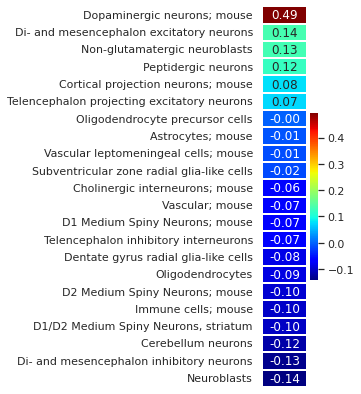

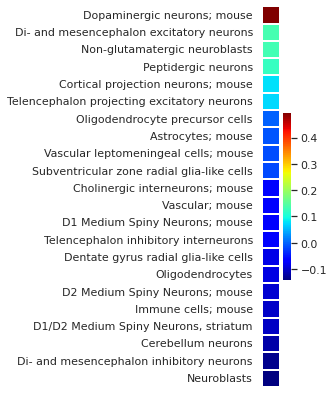

In [23]:
sns.set(rc={'figure.figsize':(1,7)})
data = strip_df_perc[list(celltypes) + ['G_content']]
G_content_corr = pd.DataFrame(data.corr()['G_content']).sort_values(by='G_content', ascending=False)
sns.heatmap(G_content_corr.iloc[1:], cmap='jet', 
            square=False,
            xticklabels=False, 
            linewidths=2, 
            yticklabels=True,
            annot=True, fmt=".2f")
plt.savefig(f'{"/".join(deconv_h5ad_path.split("/")[:-1])}/human_content_celltype_corr_annot.pdf', 
            bbox_inches='tight', dpi=400)
plt.savefig(f'{"/".join(deconv_h5ad_path.split("/")[:-1])}/human_content_celltype_corr_annot.png', 
            bbox_inches='tight', dpi=400)
plt.show()


sns.heatmap(G_content_corr.iloc[1:], cmap='jet', 
            square=True,
            xticklabels=False, 
            linewidths=2, 
            yticklabels=True,
            annot=False, fmt=".2f")
plt.savefig(f'{"/".join(deconv_h5ad_path.split("/")[:-1])}/human_content_celltype_corr.pdf', 
            bbox_inches='tight', dpi=400)
plt.savefig(f'{"/".join(deconv_h5ad_path.split("/")[:-1])}/human_content_celltype_corr.png', 
            bbox_inches='tight', dpi=400)
plt.show()

In [24]:
data.corr()['G_content'].sort_values(ascending=False)

G_content                                      1.000000
Dopaminergic neurons; mouse                    0.493962
Di- and mesencephalon excitatory neurons       0.135592
Non-glutamatergic neuroblasts                  0.132275
Peptidergic neurons                            0.120944
Cortical projection neurons; mouse             0.076097
Telencephalon projecting excitatory neurons    0.071694
Oligodendrocyte precursor cells               -0.001784
Astrocytes; mouse                             -0.009906
Vascular leptomeningeal cells; mouse          -0.013775
Subventricular zone radial glia-like cells    -0.016916
Cholinergic interneurons; mouse               -0.062574
Vascular; mouse                               -0.066853
D1 Medium Spiny Neurons; mouse                -0.067631
Telencephalon inhibitory interneurons         -0.070879
Dentate gyrus radial glia-like cells          -0.083236
Oligodendrocytes                              -0.087232
D2 Medium Spiny Neurons; mouse                -0

In [ ]:
def plot_celltype_region_violins(celltype_region_df, 
                                 all_celltypes, 
                                 singler_counts, 
                                 output, 
                                 compare_regions=['TX', 'STR']):
    
    celltype_region_df = celltype_region_df[celltype_region_df['region'].isin(compare_regions)]
    singler_celltypes = singler_counts.index.to_list()
    singler_counts = singleR_counts/singleR_counts.sum()
    print(singler_counts)
    

    celltype_region_df_singler = celltype_region_df.copy()
    non_singler_celltypes = [x for x in all_celltypes if x not in singler_celltypes]
    celltype_region_df_singler['Other'] = celltype_region_df_singler[non_singler_celltypes].sum(axis=1)
    celltype_region_df_singler.drop(non_singler_celltypes, inplace=True, axis=1)

    
    for df in [celltype_region_df_singler, celltype_region_df]:
        celltypes = [x for x in df.columns if x in set((singler_celltypes + all_celltypes))]
        
        vmax = max(df[celltypes].max().max(), singler_counts.max())
        print(vmax)
        cols = 2*2
        rows = m.ceil(len(celltypes)/(cols/2))

        fig, ax = plt.subplots(nrows=rows, ncols=cols,
                               sharey=False,
                               figsize=(3*cols, 4*rows),
                               gridspec_kw={'width_ratios':[4,3]*int((cols/2))})
        r, c = 0, 0

        cmap = cm.get_cmap('Set1')
        handles = [plt.plot([], color=cmap(c), ls="", marker="o")[0] for c in range(len(df['region'].unique()))]
        labels = df['region'].unique()
        print(labels)
        sns.despine(trim=False)
        for idx, ct in enumerate(celltypes):
            sns.violinplot(y=ct, x='slide', ax=ax[r, c],
                           hue='region',
                           cut=True,
                           legend=False,
                           palette='Set1',
                           scale='width',
                           bw=0.5,
                           data=df,
                           scale_hue=True,
                           inner=None)
            sns.stripplot(y=ct, x='slide', ax=ax[r, c],
                          hue='region',
                          dodge=True,
                          color='black',
                          alpha=0.05,
                          size=1,
                          data=df)

            sns.violinplot(x='region', y=ct, ax=ax[r, c+1],
                           cut=True,
                           scale='width',
                           bw=0.5,
                           palette='Set2',
                           data=df,
                           inner=None
                         )
            sns.stripplot(x='region', y=ct, ax=ax[r, c+1],
                          jitter=0.1,
                          dodge=True,
                          color='black',
                          alpha=0.05,
                          size=1,
                          data=df)


            ax[r, c].get_legend().remove()
            ax[r, c].set_ylim(0, vmax)
            ax[r, c+1].set_ylim(0, vmax)
#             ax[r, c+1].get_legend().remove()
            ax[r, c+1].get_yaxis().set_visible(False)
            ax[r, c+1].spines['left'].set_visible(False)
            ax[r, c].set_ylabel('')
            ax[r, c+1].set_xlabel('Combined')
            #ax[r, c+1].set_frame_on(False)
            ax_ct = fig.add_subplot(rows, int(cols/2), idx+1, frameon = False)
            ax_ct.set_xticks([])
            ax_ct.set_yticks([])
            ax_ct.set_ylim(0, vmax)
            if ct in singler_celltypes:
                ax_ct.axhline(y=singler_counts[ct],
                              xmin=-0.05,
                              xmax=1.33,
                              c="red",
                              linewidth=2,
                              linestyle='--')
            ax_ct.set_title('\n'.join(wrap(ct, 40)))

            if c+3 >= cols:
                c = 0
                r += 1
            else:
                c = c+2
        # remove unused plots
        if (idx+1)*2 < rows*cols:
            for i in range(1, (rows*cols - (idx+1)*2)+1):
                print(r, i*-1)
                ax[r, i*-1].set_visible(False)


        ax[0, cols-1].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left',
                             title='\n'.join(wrap('Feature area/slide', 20)))
        plt.tight_layout(pad=0.4)
        if len(celltypes) == len(singler_celltypes):
            file_path = output + 'Celltype_distribution_violin_SingleR.png'
            plt.savefig(file_path, bbox_inches='tight', dpi=500)
            file_path = output + 'Celltype_distribution_violin_SingleR.pdf'
        elif len(celltypes) > len(singler_celltypes):
            file_path = output + 'Celltype_distribution_violin_complete.png'
            plt.savefig(file_path, bbox_inches='tight', dpi=500)
        plt.show()


In [ ]:
def plot_celltype_region_violins_separate(celltype_region_df, 
                                 all_celltypes, 
                                 singler_counts, 
                                 output, 
                                 compare_regions=['TX', 'STR']):
    
    celltype_region_df = celltype_region_df[celltype_region_df['region'].isin(compare_regions)]
    singler_celltypes = singler_counts.index.to_list()
    singler_counts = singleR_counts/singleR_counts.sum()
    print(singler_counts)
    output = f'{output}/celltype_distr_separate_plt/'
    output_pdf = f'{output}/pdf/'
    output_png = f'{output}/png/'
    os.makedirs(output_pdf, exist_ok=True)
    os.makedirs(output_png, exist_ok=True)
    

    celltypes = [x for x in celltype_region_df.columns if x in set((singler_celltypes + all_celltypes))]

    vmax = max(celltype_region_df[celltypes].max().max(), singler_counts.max())


    cmap = cm.get_cmap('Set1')
    handles = [plt.plot([], color=cmap(c), ls="", marker="o")[0] for c in range(len(celltype_region_df['region'].unique()))]
    labels = celltype_region_df['region'].unique()
    print(labels)
        
    for idx, ct in enumerate(celltypes):
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                   sharey=False,
                                   figsize=(7, 3.5),
                                   gridspec_kw={'width_ratios':[4,3]})
        sns.despine(trim=False)
        sns.violinplot(y=ct, x='slide', ax=ax1,
                       hue='region',
                       cut=True,
                       legend=False,
                       palette='Set1',
                       scale='width',
                       bw=0.5,
                       data=celltype_region_df,
                       scale_hue=True,
                       inner=None)
        sns.stripplot(y=ct, x='slide', ax=ax1,
                      hue='region',
                      dodge=True,
                      color='black',
                      alpha=0.05,
                      size=1,
                      data=celltype_region_df)

        sns.violinplot(x='region', y=ct, ax=ax2,
                       cut=True,
                       scale='width',
                       bw=0.5,
                       palette='Set2',
                       data=celltype_region_df,
                       inner=None
                     )
        sns.stripplot(x='region', y=ct, ax=ax2,
                      jitter=0.1,
                      dodge=True,
                      color='black',
                      alpha=0.05,
                      size=1,
                      data=celltype_region_df)


        ax1.get_legend().remove()
        ax1.set_ylabel('')
        ax1.set_ylim(0, vmax)
        ax2.set_ylim(0, vmax)
#             ax[r, c+1].get_legend().remove()
        ax2.get_yaxis().set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.set_ylabel('')
        ax2.set_xlabel('Combined')
        #ax[r, c+1].set_frame_on(False)
        ax_ct = fig.add_subplot(1, 1, 1, frameon = False)
        ax_ct.set_xticks([])
        ax_ct.set_yticks([])
        ax_ct.set_ylim(0, vmax)
        if ct in singler_celltypes:
            ax_ct.axhline(y=singler_counts[ct],
                          xmin=-0.05,
                          xmax=1.33,
                          c="red",
                          linewidth=2,
                          linestyle='--')
        ax_ct.set_title('\n'.join(wrap(ct, 40)))


        ax2.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left',
                         title='\n'.join(wrap('Feature area/slide', 20)))
        plt.tight_layout(pad=0.4)
        if ct in singler_celltypes:
            file_path = f"{output_png}{ct.replace('/', '-')}_distribution_violin_SingleR.png"
            print(file_path)
            plt.savefig(file_path, bbox_inches='tight', dpi=500)
            file_path = f"{output_pdf}{ct.replace('/', '-')}_distribution_violin_SingleR.pdf"
            plt.savefig(file_path, bbox_inches='tight', dpi=500)
        else:
            file_path = f"{output_png}{ct.replace('/', '-')}_distribution_violin.png"
            print(file_path)
            plt.savefig(file_path, bbox_inches='tight', dpi=500)
            file_path = f"{output_pdf}{ct.replace('/', '-')}_distribution_violin.pdf"
            plt.savefig(file_path, bbox_inches='tight', dpi=500)
        plt.show()

In [38]:
def plot_celltype_region_violins_separate_suppl(celltype_region_df, 
                                 all_celltypes, 
                                 singler_counts, 
                                 output, 
                                 compare_regions=['SN', 'other']):
    
    celltype_region_df = celltype_region_df[celltype_region_df['region'].isin(compare_regions)]
    singler_celltypes = singler_counts.index.to_list()
    singler_counts = singleR_counts/singleR_counts.sum()
    print(singler_counts)
    output = f'{output}/celltype_distr_separate_suppl_plt/'
    output_pdf = f'{output}/pdf/'
    output_png = f'{output}/png/'
    os.makedirs(output_pdf, exist_ok=True)
    os.makedirs(output_png, exist_ok=True)
    

    celltypes = [x for x in celltype_region_df.columns if x in set((singler_celltypes + all_celltypes))]

    vmax = max(celltype_region_df[celltypes].max().max(), singler_counts.max())


    cmap = cm.get_cmap('Set1')
    handles = [plt.plot([], color=cmap(c), ls="", marker="o")[0] for c in range(len(celltype_region_df['region'].unique()))]
    labels = celltype_region_df['region'].unique()
    print(labels)
        
    for idx, ct in enumerate(celltypes):
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                   sharey=False,
                                   figsize=(7, 3.5),
                                   gridspec_kw={'width_ratios':[4,3]})
        sns.despine(trim=False)
        sns.violinplot(y=ct, x='slide', ax=ax1,
                       hue='region',
                       cut=True,
                       legend=False,
                       palette='Set1',
                       scale='width',
                       bw=0.5,
                       data=celltype_region_df,
                       scale_hue=True)
#         sns.stripplot(y=ct, x='slide', ax=ax1,
#                       hue='region',
#                       dodge=True,
#                       color='black',
#                       alpha=0.05,
#                       size=1,
#                       data=celltype_region_df)

        sns.violinplot(x='region', y=ct, ax=ax2,
                       cut=True,
                       scale='width',
                       bw=0.5,
                       palette='Set2',
                       data=celltype_region_df)
#         sns.stripplot(x='region', y=ct, ax=ax2,
#                       jitter=0.1,
#                       dodge=True,
#                       color='black',
#                       alpha=0.05,
#                       size=1,
#                       data=celltype_region_df)


        ax1.get_legend().remove()
        ax1.set_ylabel('')
        ax1.set_ylim(0, vmax)
        ax2.set_ylim(0, vmax)
#             ax[r, c+1].get_legend().remove()
        ax2.get_yaxis().set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.set_ylabel('')
        ax2.set_xlabel('Combined')
        #ax[r, c+1].set_frame_on(False)
        ax_ct = fig.add_subplot(1, 1, 1, frameon = False)
        ax_ct.set_xticks([])
        ax_ct.set_yticks([])
        ax_ct.set_ylim(0, vmax)
        if ct in singler_celltypes:
            ax_ct.axhline(y=singler_counts[ct],
                          xmin=-0.05,
                          xmax=1.33,
                          c="red",
                          linewidth=2,
                          linestyle='--')
        ax_ct.set_title('\n'.join(wrap(ct, 40)))


        ax2.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left',
                         title='\n'.join(wrap('Feature area/slide', 20)))
        plt.tight_layout(pad=0.4)
        if ct in singler_celltypes:
            file_path = f"{output_png}{ct.replace('/', '-')}_distribution_violin_SingleR.png"
            print(file_path)
            plt.savefig(file_path, bbox_inches='tight', dpi=500)
            file_path = f"{output_pdf}{ct.replace('/', '-')}_distribution_violin_SingleR.pdf"
            plt.savefig(file_path, bbox_inches='tight', dpi=500)
        else:
            file_path = f"{output_png}{ct.replace('/', '-')}_distribution_violin.png"
            print(file_path)
            plt.savefig(file_path, bbox_inches='tight', dpi=500)
            file_path = f"{output_pdf}{ct.replace('/', '-')}_distribution_violin.pdf"
            plt.savefig(file_path, bbox_inches='tight', dpi=500)
        plt.show()

In [ ]:
output = f"{'/'.join(deconv_h5ad_path.split('/')[:-1])}/"
output

In [ ]:
plot_celltype_region_violins(strip_df_stacked,
                             singler_counts = singleR_counts,
                             all_celltypes=celltypes.to_list(), 
                             output= output,
                             compare_regions=['SN', 'other'])

In [ ]:
plot_celltype_region_violins_separate(strip_df_stacked,
                             singler_counts = singleR_counts,
                             all_celltypes=celltypes.to_list(), 
                             output= output,
                             compare_regions=['TX', 'STR'])

Subventricular zone radial glia-like cells    0.634441
Vascular leptomeningeal cells; mouse          0.172717
Non-glutamatergic neuroblasts                 0.121513
Dentate gyrus radial glia-like cells          0.022418
Vascular; mouse                               0.018087
Dopaminergic neurons; mouse                   0.011464
Astrocytes; mouse                             0.010062
Telencephalon inhibitory interneurons         0.005859
Inhibitory neurons, septal nucleus            0.003439
Name: Celltype_SingleR, dtype: float64
['other' 'SN']
../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Astrocytes; mouse_distribution_violin_SingleR.png


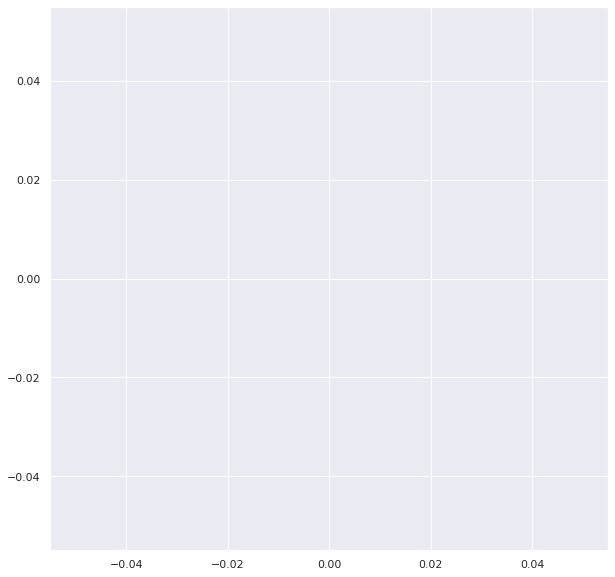

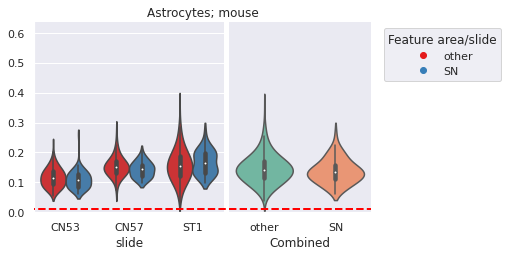

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Cerebellum neurons_distribution_violin.png


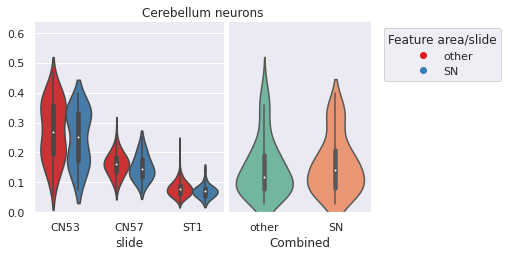

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Cholinergic interneurons; mouse_distribution_violin.png


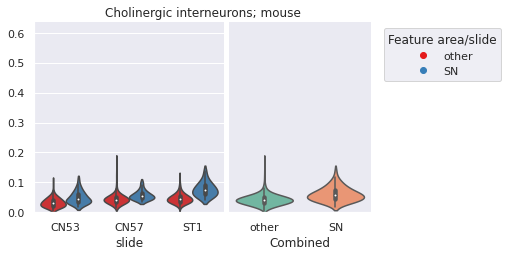

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Cortical projection neurons; mouse_distribution_violin.png


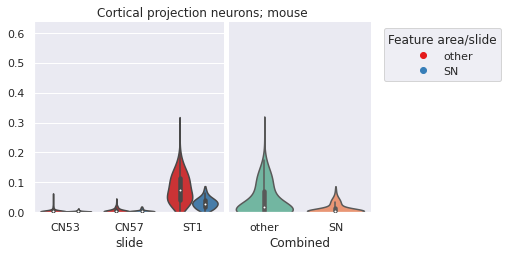

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/D1 Medium Spiny Neurons; mouse_distribution_violin.png


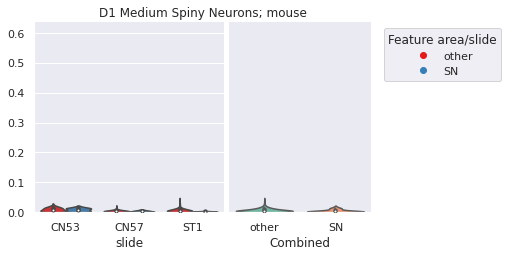

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/D1-D2 Medium Spiny Neurons, striatum_distribution_violin.png


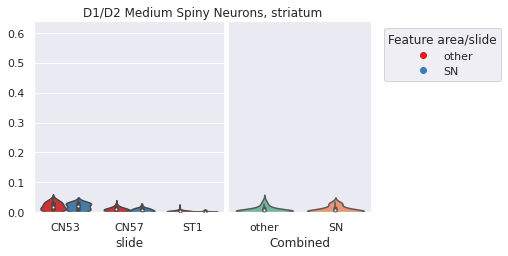

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/D2 Medium Spiny Neurons; mouse_distribution_violin.png


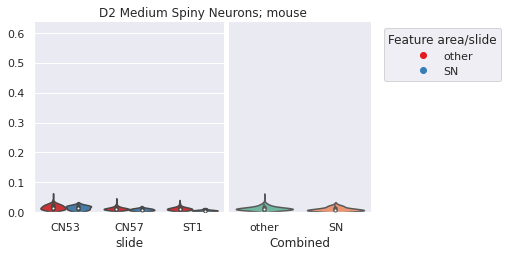

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Dentate gyrus radial glia-like cells_distribution_violin_SingleR.png


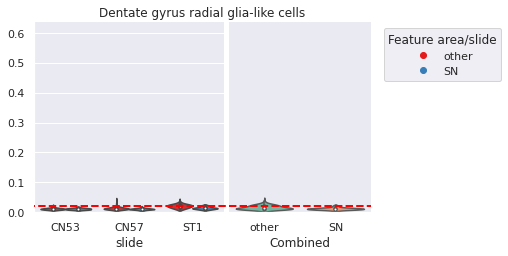

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Di- and mesencephalon excitatory neurons_distribution_violin.png


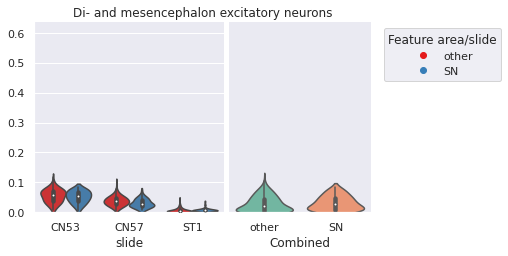

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Di- and mesencephalon inhibitory neurons_distribution_violin.png


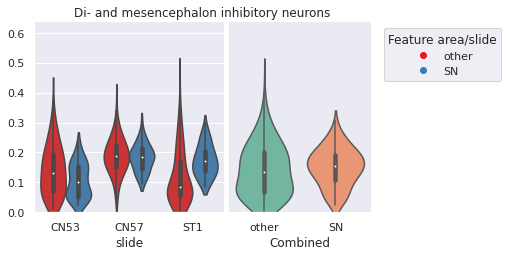

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Dopaminergic neurons; mouse_distribution_violin_SingleR.png


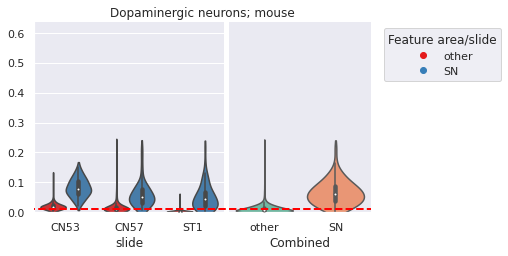

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Immune cells; mouse_distribution_violin.png


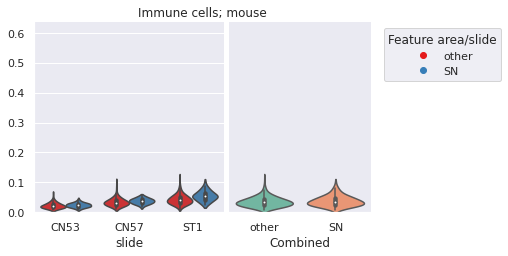

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Neuroblasts_distribution_violin.png


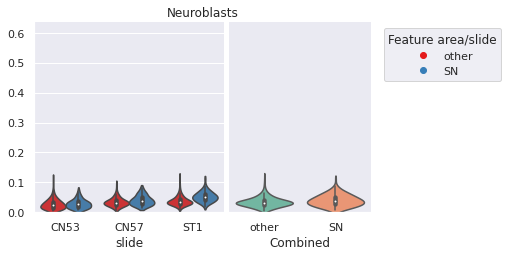

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Non-glutamatergic neuroblasts_distribution_violin_SingleR.png


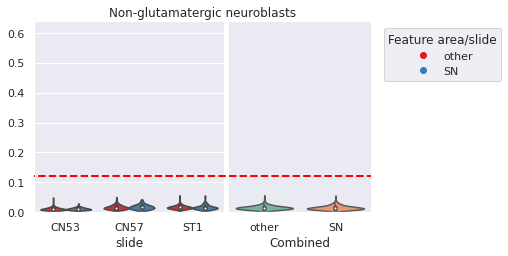

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Oligodendrocyte precursor cells_distribution_violin.png


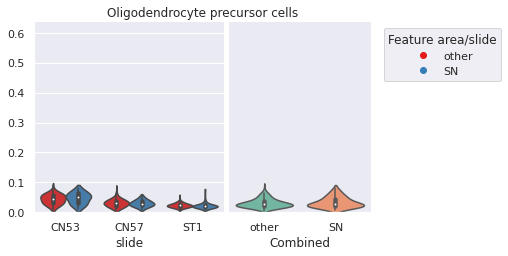

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Oligodendrocytes_distribution_violin.png


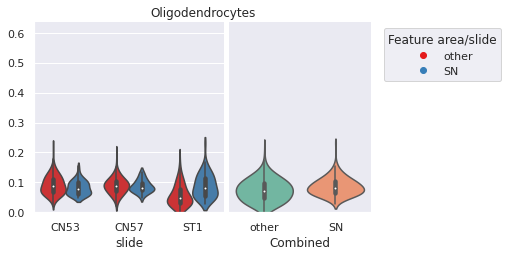

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Peptidergic neurons_distribution_violin.png


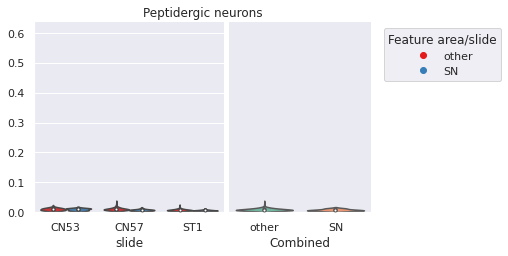

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Subventricular zone radial glia-like cells_distribution_violin_SingleR.png


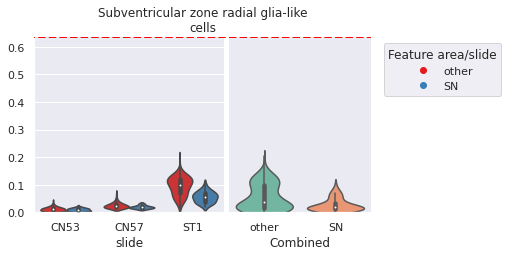

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Telencephalon inhibitory interneurons_distribution_violin_SingleR.png


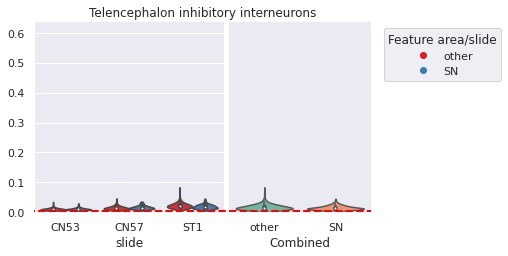

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Telencephalon projecting excitatory neurons_distribution_violin.png


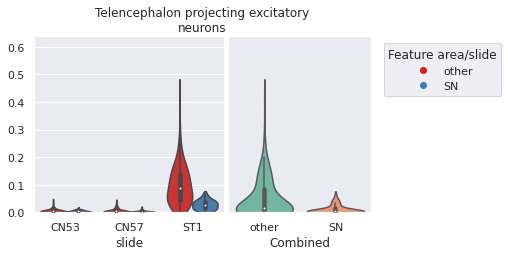

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Vascular leptomeningeal cells; mouse_distribution_violin_SingleR.png


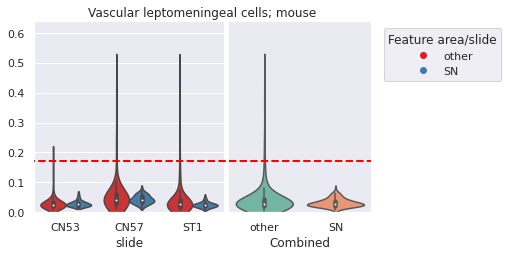

../../results/Batch_corrections/seurat/SN//celltype_distr_separate_suppl_plt//png/Vascular; mouse_distribution_violin_SingleR.png


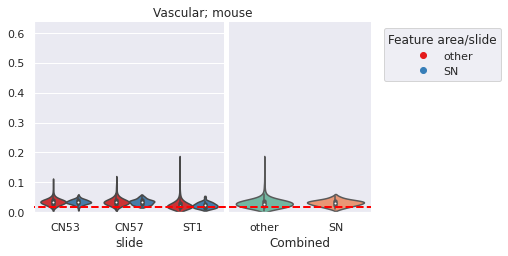

In [43]:
plot_celltype_region_violins_separate_suppl(strip_df_stacked,
                             singler_counts = singleR_counts,
                             all_celltypes=celltypes.to_list(), 
                             output= output,
                             compare_regions=['SN', 'other'])